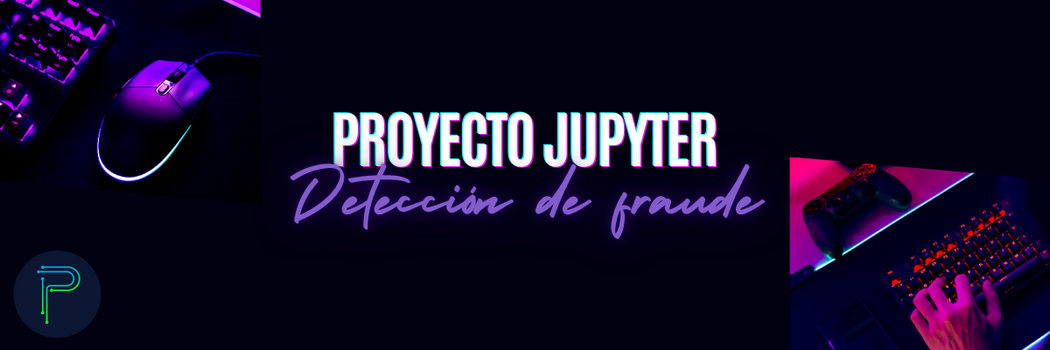

# 🚀 Descripción del proyecto

# 📚 Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 🕵🏻 Diseño e implementación del Modelo Relacional

## 🐼 Exploración de Datos con Pandas

### Exploración de alarma_fraude.json

In [ ]:
# La ruta del archivo corresponde a mi ruta local, cambiar esto para obtener el mismo resultado.

df_alarma_fraude = pd.read_json(r"C:\Users\Germa\Documents\GitHub\Proyecto_Pontia\datos\alarma_fraude.json")

# La estructura del archivo es la siguiente: (como ejemplo, un registro)

# {
#     "2736446": {
#         "t_id": 2736446,
#         "mensaje_alarma": "Detectado_fraude"
#     }
# }

# Donde:
# - "2736446" es una clave en el diccionario principal.
# - El valor asociado es otro diccionario con:
#     - "t_id": 2736446
#     - "mensaje_alarma": "Detectado_fraude"

In [ ]:
df_alarma_fraude = pd.json_normalize(df_alarma_fraude)

print(df_alarma_fraude)

In [ ]:
# Leemos los datos del JSON con "with open" antes de trabajar con dataframe y los asignamos a la variable datos:

with open(r"C:\Users\Germa\Documents\GitHub\Proyecto_Pontia\datos\alarma_fraude.json", mode = 'r') as f:
    datos_alarma_fraude = json.load(f)

datos_alarma_fraude # Vemos la estructura de datos mencionada anteriormente:

In [ ]:
# Creación del bucle para crear la lista de diccionarios:

registros = []

for clave, valor in datos_alarma_fraude.items():
    registro = {'id':clave}
    registro.update(valor)
    registros.append(registro)

# Creación del DataFrame a partir de la lista de registros:

df_alarma_fraude = pd.DataFrame(registros)

In [ ]:
df_alarma_fraude.head()

In [ ]:
# Realizamos la conversión del tipo de datos:

df_alarma_fraude['id'] = df_alarma_fraude['id'].astype(int)

# Comparamos ambas columnas:

son_iguales = (df_alarma_fraude['id'] == df_alarma_fraude['t_id']).all()

print(f"Los datos de la columna 'id' y 't_id' son iguales: {son_iguales}.")

In [ ]:
df_alarma_fraude.drop(columns='id', inplace=True)

df_alarma_fraude.head()

### Exploración de balances.json

In [ ]:
df_balances = pd.read_json(r"C:\Users\Germa\Documents\GitHub\Proyecto_Pontia\datos\balances.json", chunksize=10000, lines=True)

In [ ]:
for chunk in df_balances:
    print(chunk.head())
    break